<a href="https://colab.research.google.com/github/Mal-Lem/Models_r-gression_lin-aire/blob/main/R%C3%A9gression_Lin%C3%A9aire_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

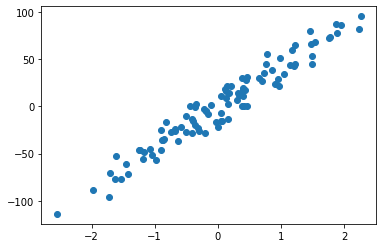

In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

np.random.seed(0) #pour tjr reproduire le mm dataset
x , y = make_regression(n_samples = 100, n_features = 1 , noise = 10)# entre nbr de X et un autre 10 dans notre exepmle entre -2 et 8
plt.scatter(x,y)

In [3]:
#pour verifier les dimanssions d'une matrice
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [4]:
#dans notre dimanssion on vois que y n'as pas nbr de ligne alors on l redimensionne
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [5]:
#creation d'une matrice qui contient la colonne de Biais 
X = np.hstack((x , np.ones(x.shape)))
print(X.shape)

(100, 2)


In [6]:
#creation du vecteur thèta 
np.random.seed(0)
theta = np.random.randn(2,1)#generer une matrice c'elemt entre 0 et 10
theta

array([[1.76405235],
       [0.40015721]])

In [7]:
#implementer un model F = X*théta (m*1)
def model (X, theta):
    return X.dot(theta)

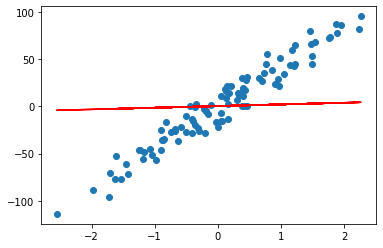

In [8]:
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r') 

In [9]:
# fonction de cout 
def cost_function(X, y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [10]:
cost_function(X,y,theta)

905.6306841935502

In [11]:
#function qui calcul l derivée
def grad(X,y,theta):
   m= len(y)
   return 1/m*X.T.dot(model(X,theta)-y)

In [14]:
#dradient descent
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
     theta = theta - learning_rate * grad(X,y,theta)
     cost_history[i] = cost_function(X,y,theta) 
    return theta, cost_history

In [21]:
 n_iterations = 1000
 learning_rate = 0.01
 theta_final,cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)

In [22]:
theta_final

array([[42.61765864],
       [-0.81309274]])

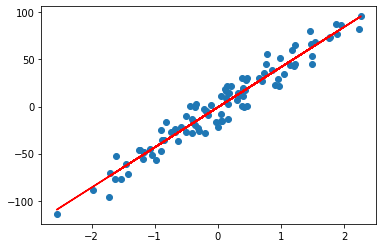

In [23]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions, c='r')

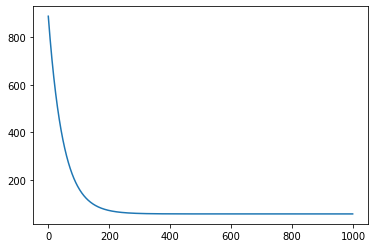

In [24]:
plt.plot(range(n_iterations),cost_history)

In [25]:
#evaluation finale
def coef_determination(y,pred):
  u = ((y-pred)**2).sum()
  v = ((y-y.mean()**2)).sum()
  return 1-u/v

In [26]:
coef_determination(y,predictions)

90.56486182021096